In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\Admin\Downloads\Bank_churn.csv")

In [3]:
data.shape

(10000, 14)

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


Text(0.5, 1.0, 'Number of Customers by Geography')

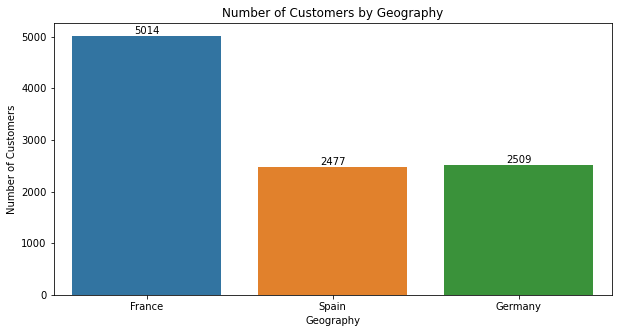

In [7]:
# Number of customers by Geography
plt.figure(figsize=(10,5))
ax = sns.countplot(data['Geography'])
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Geography')

Text(0.5, 1.0, 'Number of Customers by Gender')

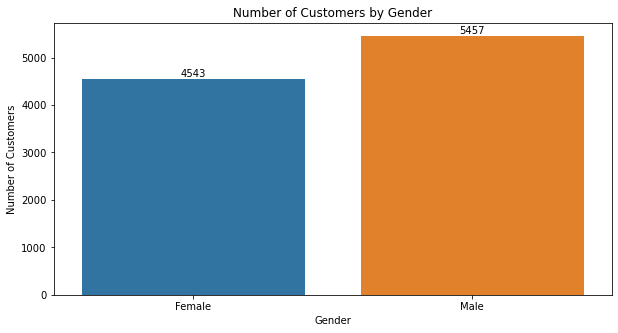

In [8]:
# Number of customers by Gender
plt.figure(figsize=(10,5))
ax = sns.countplot(data['Gender'])
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Gender')

In [9]:
# Number of Customer by Geography
print('Customer exited in France: ', data['Exited'][data['Geography'] == 'France'].value_counts())
print('Customer exited in Spain: ',data['Exited'][data['Geography'] == 'Spain'].value_counts())
print('Customer exited in Germany: ', data['Exited'][data['Geography'] == 'Germany'].value_counts())

Customer exited in France:  0    4204
1     810
Name: Exited, dtype: int64
Customer exited in Spain:  0    2064
1     413
Name: Exited, dtype: int64
Customer exited in Germany:  0    1695
1     814
Name: Exited, dtype: int64


Text(0.5, 1.0, 'Customer exited by Geography')

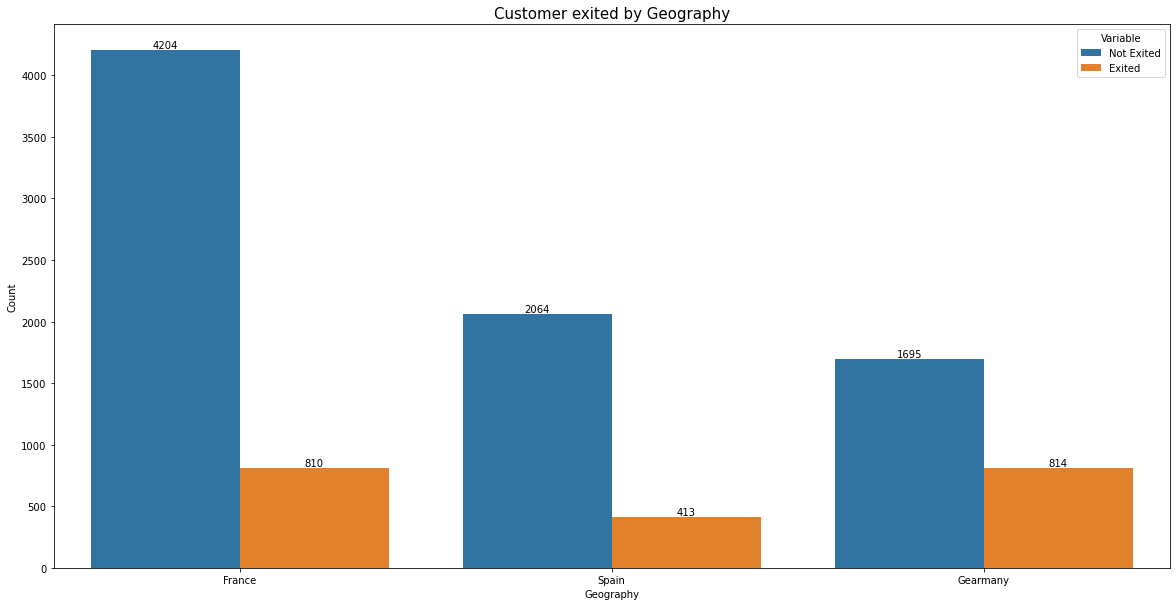

In [10]:

df_1 = pd.DataFrame({
    'Geography': ['France', 'Spain','Gearmany'],
    'Not Exited': [4204,2064,1695],
    'Exited': [810,413,814]
})
fig, ax1 = plt.subplots(figsize=(20, 10))
tidy = df_1.melt(id_vars='Geography').rename(columns=str.title)
sns.barplot(x='Geography', y='Value', hue='Variable', data=tidy, ax=ax1)
ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])
plt.ylabel('Count')
plt.title('Customer exited by Geography',fontsize=15)

In [11]:
# Number of Customer Exited by gender
print('Female customer Exited: ',data['Exited'][data['Gender']=='Female'].value_counts())
print('Male customer Exited: ',data['Exited'][data['Gender']=='Male'].value_counts())

Female customer Exited:  0    3404
1    1139
Name: Exited, dtype: int64
Male customer Exited:  0    4559
1     898
Name: Exited, dtype: int64


Text(0.5, 1.0, 'Customer exited by Gender')

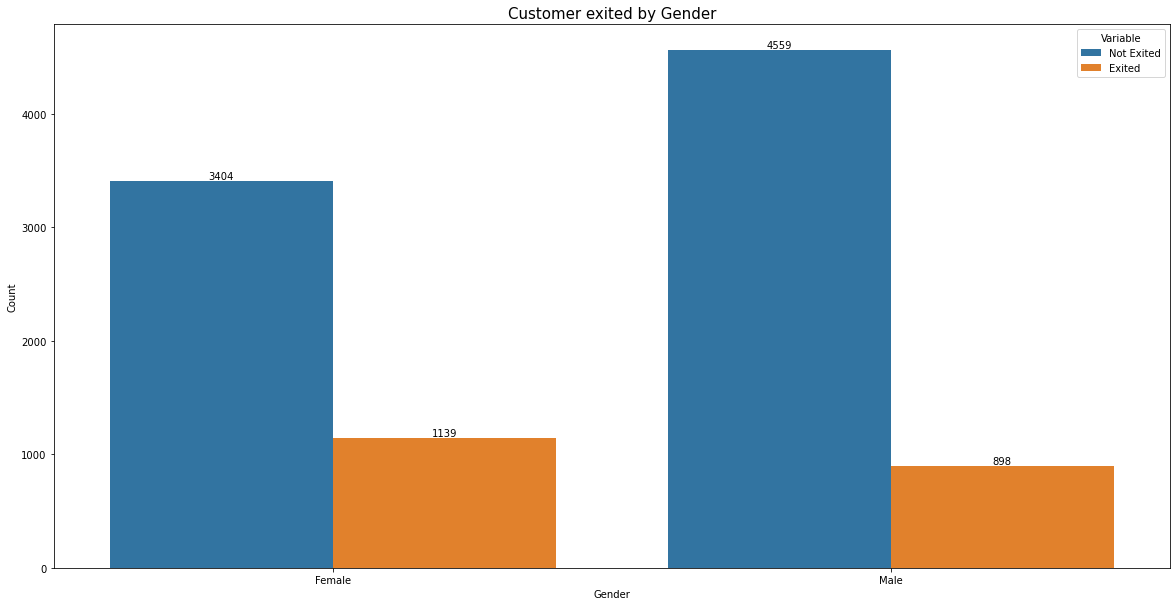

In [12]:
df_1 = pd.DataFrame({
    'Gender': ['Female', 'Male'],
    'Not Exited': [3404,4559],
    'Exited': [1139,898]
})
fig, ax1 = plt.subplots(figsize=(20, 10))
tidy = df_1.melt(id_vars='Gender').rename(columns=str.title)
sns.barplot(x='Gender', y='Value', hue='Variable', data=tidy, ax=ax1)
ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])
plt.ylabel('Count')
plt.title('Customer exited by Gender',fontsize=15)

In [13]:
# Number of Customer Exited by one having credit card or not
print('Has credit card and Exited: ',data['Exited'][data['HasCrCard']==1].value_counts())
print('Not has Credit card and Exited: ',data['Exited'][data['HasCrCard']==0].value_counts())

Has credit card and Exited:  0    5631
1    1424
Name: Exited, dtype: int64
Not has Credit card and Exited:  0    2332
1     613
Name: Exited, dtype: int64


Text(0.5, 1.0, 'Customer has credit card or not ')

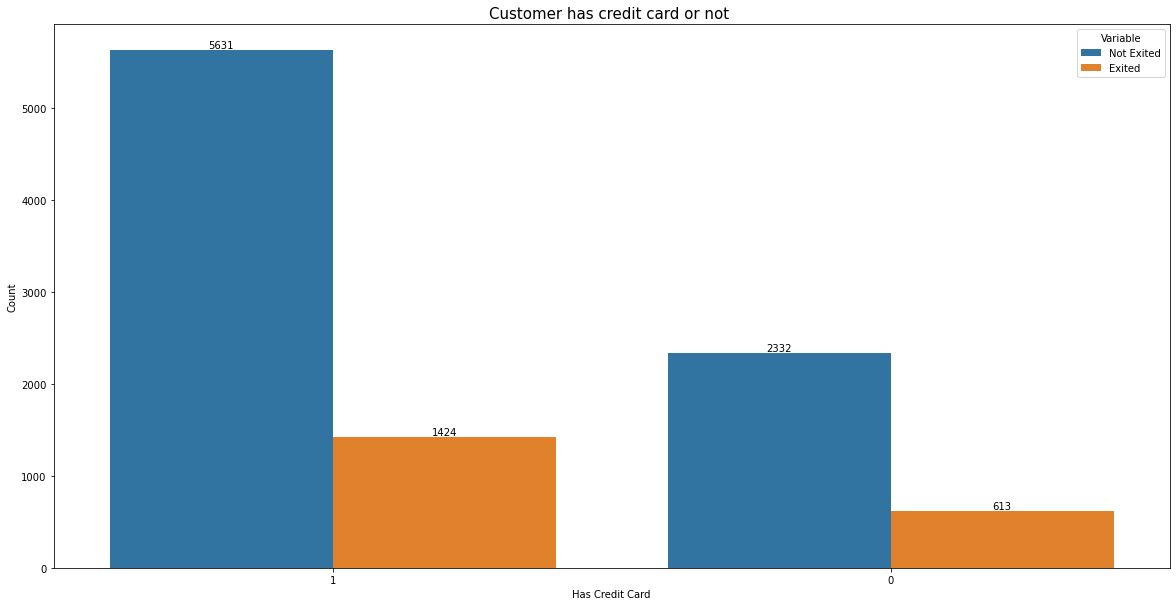

In [14]:
df_1 = pd.DataFrame({
    'Has Credit Card': ['1', '0'],
    'Not Exited': [5631,2332],
    'Exited': [1424,613]
})
fig, ax1 = plt.subplots(figsize=(20, 10))
tidy = df_1.melt(id_vars='Has Credit Card').rename(columns=str.title)
sns.barplot(x='Has Credit Card', y='Value', hue='Variable', data=tidy, ax=ax1)
ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])
plt.ylabel('Count')
plt.title('Customer has credit card or not ',fontsize=15)

In [15]:
# Number of Customer Exited by one is active menber or not
print('Has credit card and Exited: ',data['Exited'][data['IsActiveMember']==1].value_counts())
print('Not has Credit card and Exited: ',data['Exited'][data['IsActiveMember']==0].value_counts())

Has credit card and Exited:  0    4416
1     735
Name: Exited, dtype: int64
Not has Credit card and Exited:  0    3547
1    1302
Name: Exited, dtype: int64


Text(0.5, 1.0, 'Customer is active member or not')

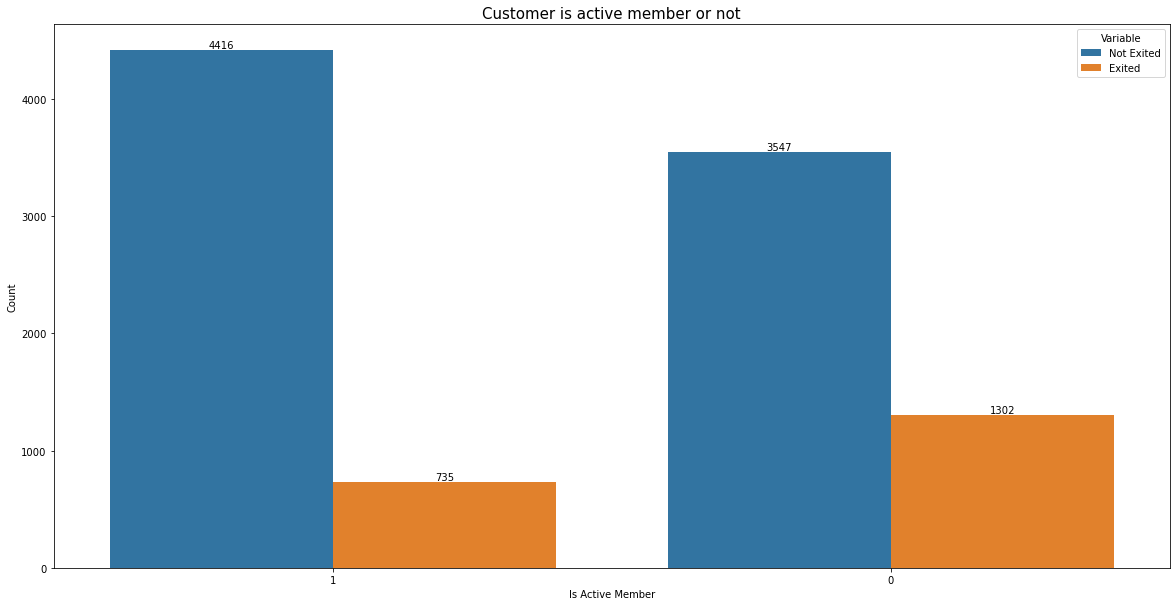

In [16]:
df_1 = pd.DataFrame({
    'Is Active Member': ['1', '0'],
    'Not Exited': [4416,3547],
    'Exited': [735,1302]
})
fig, ax1 = plt.subplots(figsize=(20, 10))
tidy = df_1.melt(id_vars='Is Active Member').rename(columns=str.title)
sns.barplot(x='Is Active Member', y='Value', hue='Variable', data=tidy, ax=ax1)
ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])
plt.ylabel('Count')
plt.title('Customer is active member or not',fontsize=15)

In [18]:
df = data.drop(['RowNumber','CustomerId','Surname'],1)

In [19]:
df.shape

(10000, 11)

In [20]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
df_corr = df.corr()
df_corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


Text(0.5, 1.0, 'Number of Customers Exited')

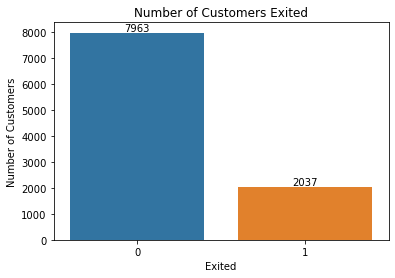

In [22]:
ax = sns.countplot(df['Exited'])
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel('Number of Customers')
plt.title('Number of Customers Exited')

Text(0.5, 1.0, '% of Customer Exited')

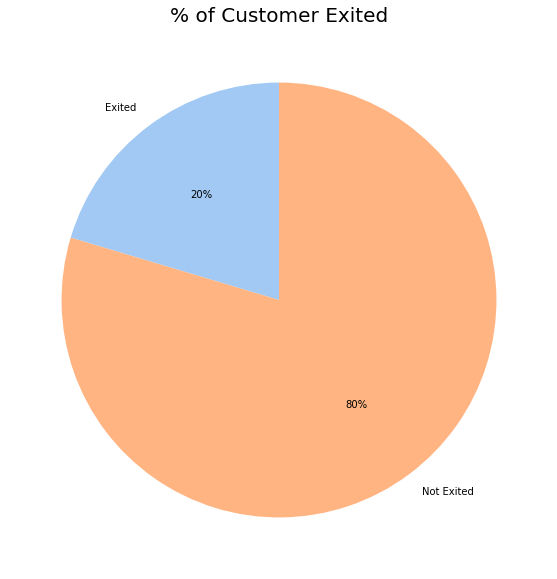

In [23]:
data = [2037,7963]
labels = ['Exited', 'Not Exited']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=(10,10))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%',startangle=90)
plt.title('% of Customer Exited',fontsize=20)

<AxesSubplot:>

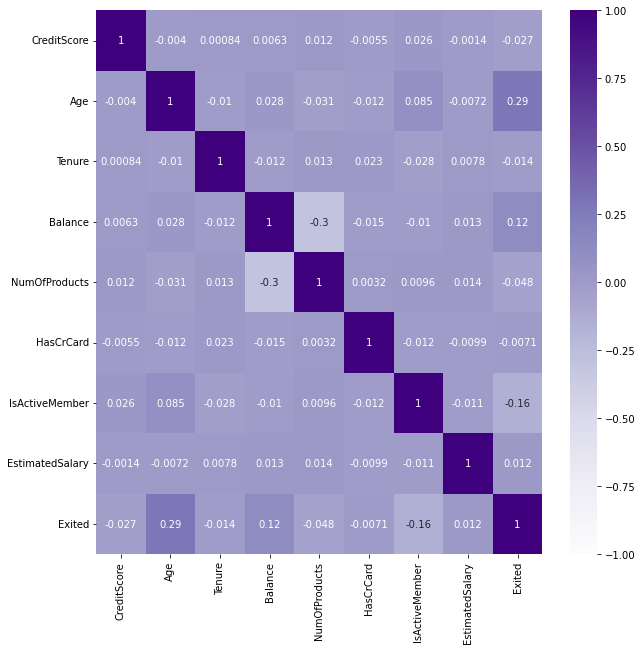

In [24]:
# Visualizing the above correlation matrix with the help of Heatmap
plt.figure(figsize = (10,10))
sns.heatmap(df_corr,annot = True,vmin = -1,vmax = 1,cmap="Purples")

In [25]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
df['Gender'] = df['Gender'].map({'Female':0, 'Male':1})

In [27]:
df['Geography'] = df['Geography'].map({'France':0, 'Spain':1, 'Germany':2})

In [28]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [29]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
sc = StandardScaler()
x = df.drop(['Exited'],1)
y = df['Exited']

sc.fit(x)
x_transformed = sc.transform(x)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_transformed, y, test_size = 0.35, random_state=105)

## SVM Model: 

In [32]:
model = SVC()
model.fit(x_train, y_train)

SVC()

In [33]:
y_pred = model.predict(x_test)

In [34]:
print('Accuracy: ',accuracy_score(y_pred, y_test)*100,'%')

Accuracy:  85.77142857142857 %


In [35]:
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[2736   71]
 [ 427  266]]


In [36]:
print('Classification Report: \n',classification_report(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      2807
           1       0.79      0.38      0.52       693

    accuracy                           0.86      3500
   macro avg       0.83      0.68      0.72      3500
weighted avg       0.85      0.86      0.84      3500



## Logistic Regression Model:

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

LogisticRegression()

In [39]:
y_pred = logmodel.predict(x_test)

In [40]:
print('Accuracy: ',accuracy_score(y_pred, y_test)*100,'%')

Accuracy:  81.2 %


In [41]:
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[2698  109]
 [ 549  144]]


In [42]:
print('Classification Report: \n',classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      2807
           1       0.57      0.21      0.30       693

    accuracy                           0.81      3500
   macro avg       0.70      0.58      0.60      3500
weighted avg       0.78      0.81      0.78      3500



## kNN Model:

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
pred = model.predict(x_test)

In [46]:
print('Accuracy: ',accuracy_score(pred,y_test)*100,'%')

Accuracy:  83.25714285714285 %


In [47]:
print('Confusion Matrix: \n',confusion_matrix( y_test, pred))

Confusion Matrix: 
 [[2620  187]
 [ 399  294]]


In [48]:
print('Classification Report: \n',classification_report( y_test,pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      2807
           1       0.61      0.42      0.50       693

    accuracy                           0.83      3500
   macro avg       0.74      0.68      0.70      3500
weighted avg       0.82      0.83      0.82      3500

